In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## 1. Import dataset

In [2]:
index_col_names=['unit_id','time_cycle']
operat_set_col_names=['oper_set{}'.format(i) for i in range(1,4)]
sensor_measure_col_names=['sm_{}'.format(i) for i in range(1,22)]
all_col=index_col_names+operat_set_col_names+sensor_measure_col_names
print(all_col)

['unit_id', 'time_cycle', 'oper_set1', 'oper_set2', 'oper_set3', 'sm_1', 'sm_2', 'sm_3', 'sm_4', 'sm_5', 'sm_6', 'sm_7', 'sm_8', 'sm_9', 'sm_10', 'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_16', 'sm_17', 'sm_18', 'sm_19', 'sm_20', 'sm_21']


In [3]:
train_df=pd.read_csv('../input/nasa-cmaps/CMaps/train_FD001.txt',delim_whitespace=True,names=all_col)
train_df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [4]:
train_df[train_df.unit_id==1]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_id     20631 non-null  int64  
 1   time_cycle  20631 non-null  int64  
 2   oper_set1   20631 non-null  float64
 3   oper_set2   20631 non-null  float64
 4   oper_set3   20631 non-null  float64
 5   sm_1        20631 non-null  float64
 6   sm_2        20631 non-null  float64
 7   sm_3        20631 non-null  float64
 8   sm_4        20631 non-null  float64
 9   sm_5        20631 non-null  float64
 10  sm_6        20631 non-null  float64
 11  sm_7        20631 non-null  float64
 12  sm_8        20631 non-null  float64
 13  sm_9        20631 non-null  float64
 14  sm_10       20631 non-null  float64
 15  sm_11       20631 non-null  float64
 16  sm_12       20631 non-null  float64
 17  sm_13       20631 non-null  float64
 18  sm_14       20631 non-null  float64
 19  sm_15       20631 non-nul

The dimensions of test set and RUL data are different, because RUL file assigns one value per unit. Then, we assign the RUL value to the last data point for each unit and adding one to each row above 

In [6]:
test_df=pd.read_csv('../input/nasa-cmaps/CMaps/test_FD001.txt',delim_whitespace=True,names=all_col)
test_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unit_id     13096 non-null  int64  
 1   time_cycle  13096 non-null  int64  
 2   oper_set1   13096 non-null  float64
 3   oper_set2   13096 non-null  float64
 4   oper_set3   13096 non-null  float64
 5   sm_1        13096 non-null  float64
 6   sm_2        13096 non-null  float64
 7   sm_3        13096 non-null  float64
 8   sm_4        13096 non-null  float64
 9   sm_5        13096 non-null  float64
 10  sm_6        13096 non-null  float64
 11  sm_7        13096 non-null  float64
 12  sm_8        13096 non-null  float64
 13  sm_9        13096 non-null  float64
 14  sm_10       13096 non-null  float64
 15  sm_11       13096 non-null  float64
 16  sm_12       13096 non-null  float64
 17  sm_13       13096 non-null  float64
 18  sm_14       13096 non-null  float64
 19  sm_15       13096 non-nul

In [8]:
y_true=pd.read_csv('../input/nasa-cmaps/CMaps/RUL_FD001.txt',delim_whitespace=True,names=['RUL'])
y_true['number_unit']=y_true.index+1
y_true.head()

,RUL,number_unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [9]:
y_true

,RUL,number_unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [10]:
test_df[test_df.unit_id==1]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


## 2. Obtain RUL

## 2.1 training set

In [11]:
#find maximum time cycle for each unit d
max_time_cycle=train_df.groupby('unit_id')['time_cycle'].max()
print(max_time_cycle)
rul = pd.DataFrame(max_time_cycle).reset_index()
rul.columns = ['unit_id', 'max']
rul.head()

unit_id
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycle, Length: 100, dtype: int64


,unit_id,max
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269


In [12]:
rul

,unit_id,max
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [13]:
#merge train_df with rul dataframe based on number unit, that is the column join, using the left join
train_df = train_df.merge(rul, on=['unit_id'], how='left')

In [14]:
train_df['RUL'] = train_df['max'] - train_df['time_cycle']
train_df.drop('max', axis=1, inplace=True)

In [15]:
train_df[train_df.unit_id==1].iloc[:,[1,-1]]

,time_cycle,RUL
0,1,191
1,2,190
2,3,189
3,4,188
4,5,187
...,...,...
187,188,4
188,189,3
189,190,2
190,191,1


## 2.2 test set

In [16]:
test_df[test_df.unit_id==2]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
31,2,1,-0.0009,0.0004,100.0,518.67,642.66,1589.30,1407.16,14.62,...,521.62,2388.14,8129.59,8.4283,0.03,392,2388,100.0,39.00,23.3923
32,2,2,-0.0011,0.0002,100.0,518.67,642.51,1588.43,1405.47,14.62,...,522.02,2388.08,8120.05,8.4414,0.03,393,2388,100.0,38.84,23.2902
33,2,3,0.0002,0.0003,100.0,518.67,642.58,1595.60,1410.86,14.62,...,521.29,2388.08,8126.75,8.3804,0.03,394,2388,100.0,39.02,23.4064
34,2,4,0.0025,0.0001,100.0,518.67,642.31,1583.43,1408.23,14.62,...,521.57,2388.06,8129.91,8.4342,0.03,393,2388,100.0,38.82,23.4699
35,2,5,0.0004,-0.0004,100.0,518.67,642.77,1585.03,1407.60,14.62,...,521.59,2388.11,8127.01,8.4247,0.03,392,2388,100.0,38.81,23.3895
36,2,6,-0.0008,-0.0003,100.0,518.67,642.50,1579.87,1402.27,14.62,...,521.80,2388.06,8128.82,8.4182,0.03,392,2388,100.0,38.78,23.2688
37,2,7,0.0019,0.0000,100.0,518.67,642.63,1594.28,1405.38,14.62,...,520.97,2388.07,8127.07,8.4113,0.03,393,2388,100.0,38.75,23.5222
38,2,8,0.0015,0.0003,100.0,518.67,642.61,1583.23,1404.58,14.62,...,521.72,2388.15,8134.66,8.4430,0.03,391,2388,100.0,38.79,23.2240
39,2,9,-0.0022,0.0003,100.0,518.67,642.28,1588.74,1407.54,14.62,...,521.48,2388.08,8131.51,8.4459,0.03,392,2388,100.0,38.71,23.2730
40,2,10,0.0021,0.0004,100.0,518.67,642.53,1590.87,1406.04,14.62,...,521.09,2388.10,8123.71,8.4211,0.03,392,2388,100.0,38.92,23.3399


In [17]:
list(reversed(range(len(test_df[test_df.unit_id==1]))))

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0]

In [18]:
test_df[test_df.unit_id==1].iloc[0,-1]

23.3735

In [19]:
test_df[test_df.unit_id==2].iloc[0,-1]

23.3923

In [20]:
#find maximum time cycle for each unit d
max_time_cycle_test=test_df.groupby('unit_id')['time_cycle'].max()
print(max_time_cycle_test)
rul_test = pd.DataFrame(max_time_cycle_test).reset_index()
rul_test.columns = ['unit_id', 'RUL']
rul_test.head()
test_df = test_df.merge(rul_test, on=['unit_id'], how='left')

unit_id
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Name: time_cycle, Length: 100, dtype: int64


In [21]:
test_df[test_df.unit_id==1]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,31
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952,31
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224,31
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521,31
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820,31


In [22]:
list(reversed(range(len(test_df[test_df.unit_id==1]))))

[30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1,
 0]

In [23]:
test_df['RUL']=0

In [24]:
test_df

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0


In [25]:
test_df.loc[test_df.unit_id==i,'RUL'][r]

NameError: name 'i' is not defined

In [26]:
test_df[test_df.unit_id==1]

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,0
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952,0
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224,0
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521,0
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820,0


## 3. Feature Selection

In [27]:
train_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [28]:
train_df[index_col_names].corr()

,unit_id,time_cycle
unit_id,1.000000,0.078753
time_cycle,0.078753,1.000000


In [29]:
train_df[operat_set_col_names].corr()

,oper_set1,oper_set2,oper_set3
oper_set1,1.00000,0.01166,NaN
oper_set2,0.01166,1.00000,NaN
oper_set3,NaN,NaN,NaN


In [30]:
train_df[sensor_measure_col_names].corr()

,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,sm_7,sm_8,sm_9,sm_10,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
sm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_2,NaN,1.000000,0.602610,0.714949,NaN,0.132242,-0.702136,0.662325,0.273764,NaN,...,-0.724578,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050
sm_3,NaN,0.602610,1.000000,0.678413,NaN,0.116039,-0.664595,0.602481,0.322964,NaN,...,-0.680307,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901
sm_4,NaN,0.714949,0.678413,1.000000,NaN,0.150480,-0.793130,0.746852,0.297429,NaN,...,-0.815591,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193
sm_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_6,NaN,0.132242,0.116039,0.150480,NaN,1.000000,-0.155720,0.152161,0.019347,NaN,...,-0.155884,0.158276,-0.002112,0.149042,NaN,0.130810,NaN,NaN,-0.141419,-0.137419
sm_7,NaN,-0.702136,-0.664595,-0.793130,NaN,-0.155720,1.000000,-0.767132,-0.217835,NaN,...,0.812713,-0.764611,-0.110053,-0.747051,NaN,-0.692893,NaN,NaN,0.736163,0.737447
sm_8,NaN,0.662325,0.602481,0.746852,NaN,0.152161,-0.767132,1.000000,-0.032091,NaN,...,-0.786540,0.826084,-0.144787,0.700949,NaN,0.627785,NaN,NaN,-0.687030,-0.688840
sm_9,NaN,0.273764,0.322964,0.297429,NaN,0.019347,-0.217835,-0.032091,1.000000,NaN,...,-0.210238,-0.034763,0.963157,0.293753,NaN,0.337110,NaN,NaN,-0.285280,-0.292795
sm_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From correlation matrix, we notice:
* oper_set3 is not correlated with the other variables
* sensor 1, 5,10,16,18,19

In [31]:
train_df.iloc[:,1:-1].corr()

,time_cycle,oper_set1,oper_set2,oper_set3,sm_1,sm_2,sm_3,sm_4,sm_5,sm_6,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
time_cycle,1.000000,-0.004527,0.016132,NaN,NaN,0.549898,0.543947,0.624577,NaN,0.105980,...,-0.611354,0.477523,0.370324,0.588676,NaN,0.566995,NaN,NaN,-0.583597,-0.585923
oper_set1,-0.004527,1.000000,0.011660,NaN,NaN,0.009030,-0.005651,0.009544,NaN,-0.001340,...,-0.001491,0.002318,-0.004469,0.007652,NaN,0.002599,NaN,NaN,-0.005713,-0.014559
oper_set2,0.016132,0.011660,1.000000,NaN,NaN,0.007266,0.009068,0.014673,NaN,0.014355,...,-0.010923,0.018156,-0.006310,0.014156,NaN,0.012280,NaN,NaN,-0.010554,-0.007846
oper_set3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_2,0.549898,0.009030,0.007266,NaN,NaN,1.000000,0.602610,0.714949,NaN,0.132242,...,-0.724578,0.661792,0.179752,0.675975,NaN,0.629886,NaN,NaN,-0.661841,-0.668050
sm_3,0.543947,-0.005651,0.009068,NaN,NaN,0.602610,1.000000,0.678413,NaN,0.116039,...,-0.680307,0.600963,0.237137,0.639921,NaN,0.600017,NaN,NaN,-0.625941,-0.633901
sm_4,0.624577,0.009544,0.014673,NaN,NaN,0.714949,0.678413,1.000000,NaN,0.150480,...,-0.815591,0.745158,0.190748,0.758459,NaN,0.703499,NaN,NaN,-0.748067,-0.745193
sm_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_6,0.105980,-0.001340,0.014355,NaN,NaN,0.132242,0.116039,0.150480,NaN,1.000000,...,-0.155884,0.158276,-0.002112,0.149042,NaN,0.130810,NaN,NaN,-0.141419,-0.137419


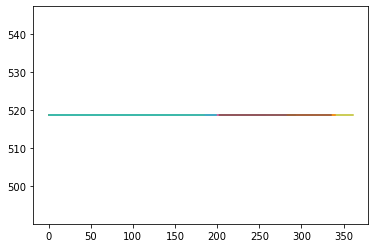

In [32]:
for i in train_df['unit_id'].unique():
  plt.plot('RUL','sm_1',data=train_df[train_df['unit_id']==i])
plt.show()

In [33]:
len(all_col[1:]),all_col[1:]

(25,
 ['time_cycle',
  'oper_set1',
  'oper_set2',
  'oper_set3',
  'sm_1',
  'sm_2',
  'sm_3',
  'sm_4',
  'sm_5',
  'sm_6',
  'sm_7',
  'sm_8',
  'sm_9',
  'sm_10',
  'sm_11',
  'sm_12',
  'sm_13',
  'sm_14',
  'sm_15',
  'sm_16',
  'sm_17',
  'sm_18',
  'sm_19',
  'sm_20',
  'sm_21'])

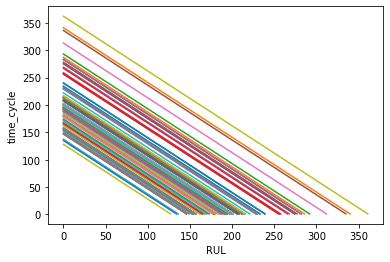

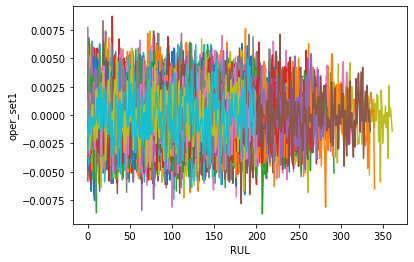

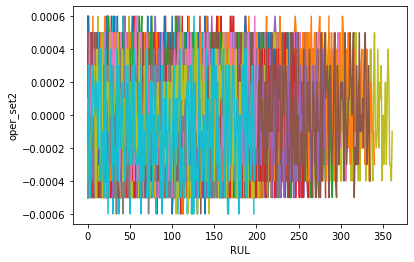

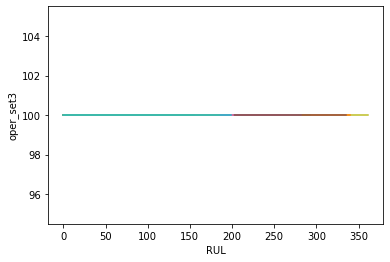

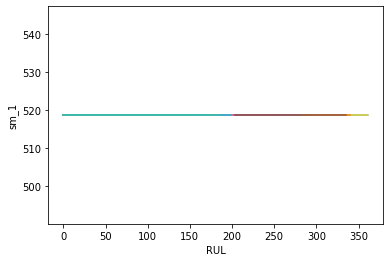

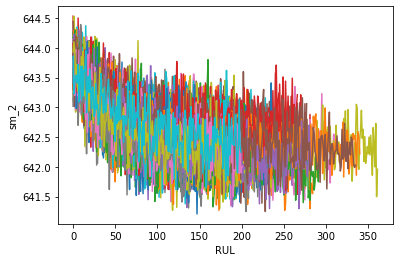

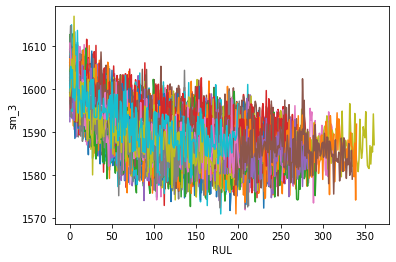

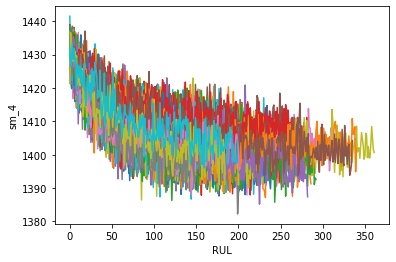

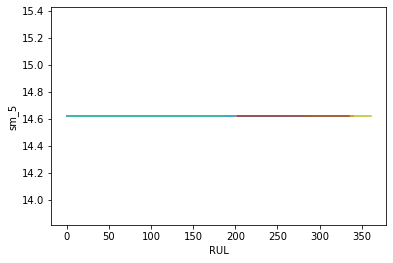

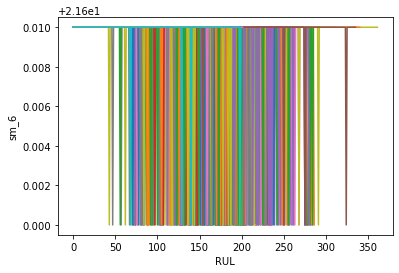

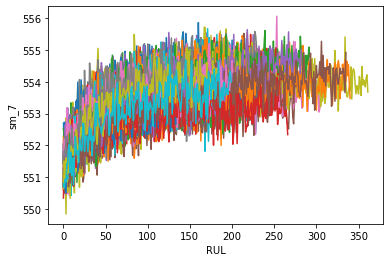

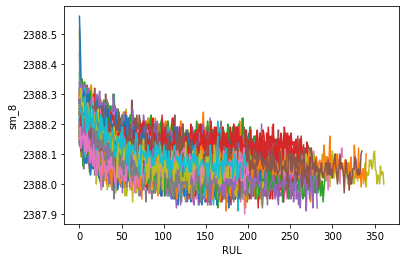

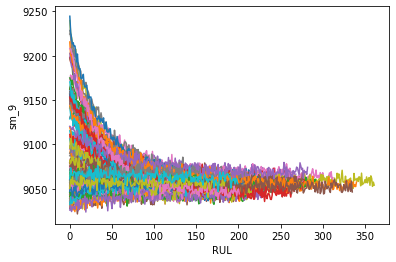

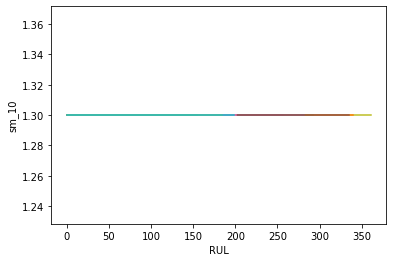

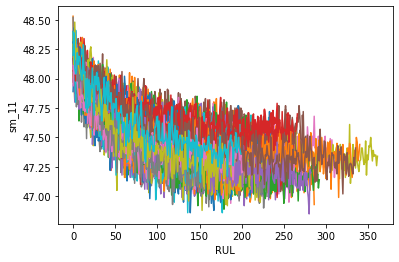

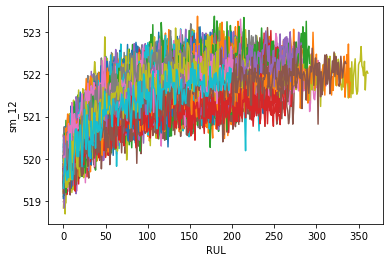

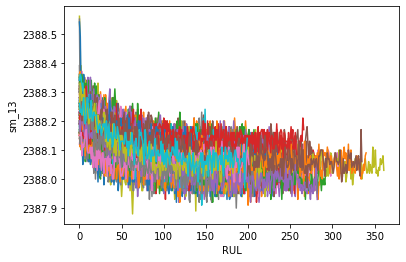

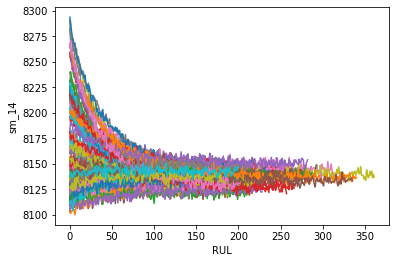

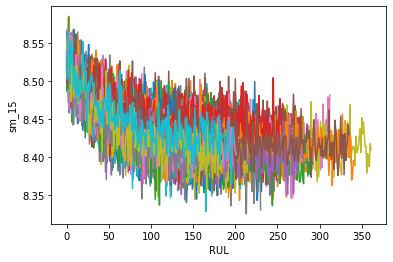

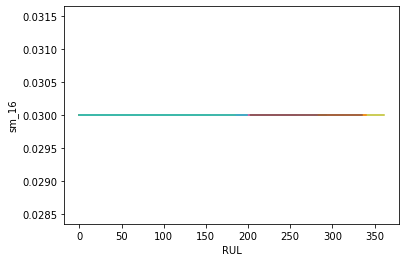

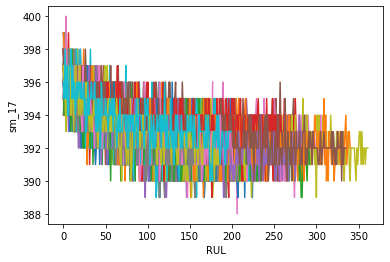

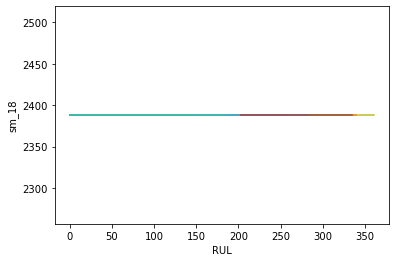

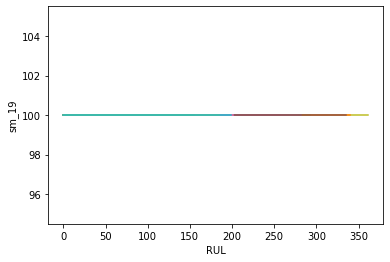

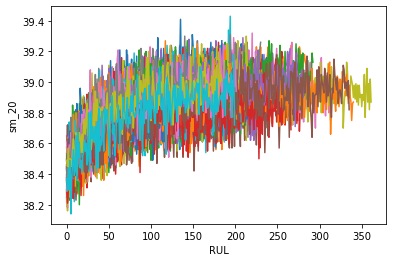

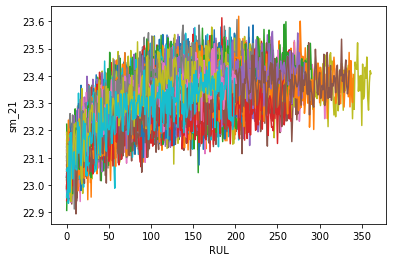

In [34]:
for v_idx,v in enumerate(all_col[1:]):
    for i in train_df['unit_id'].unique():
        plt.plot('RUL',v,data=train_df[train_df['unit_id']==i])
    plt.xlabel('RUL')
    plt.ylabel(v)
    plt.show()    

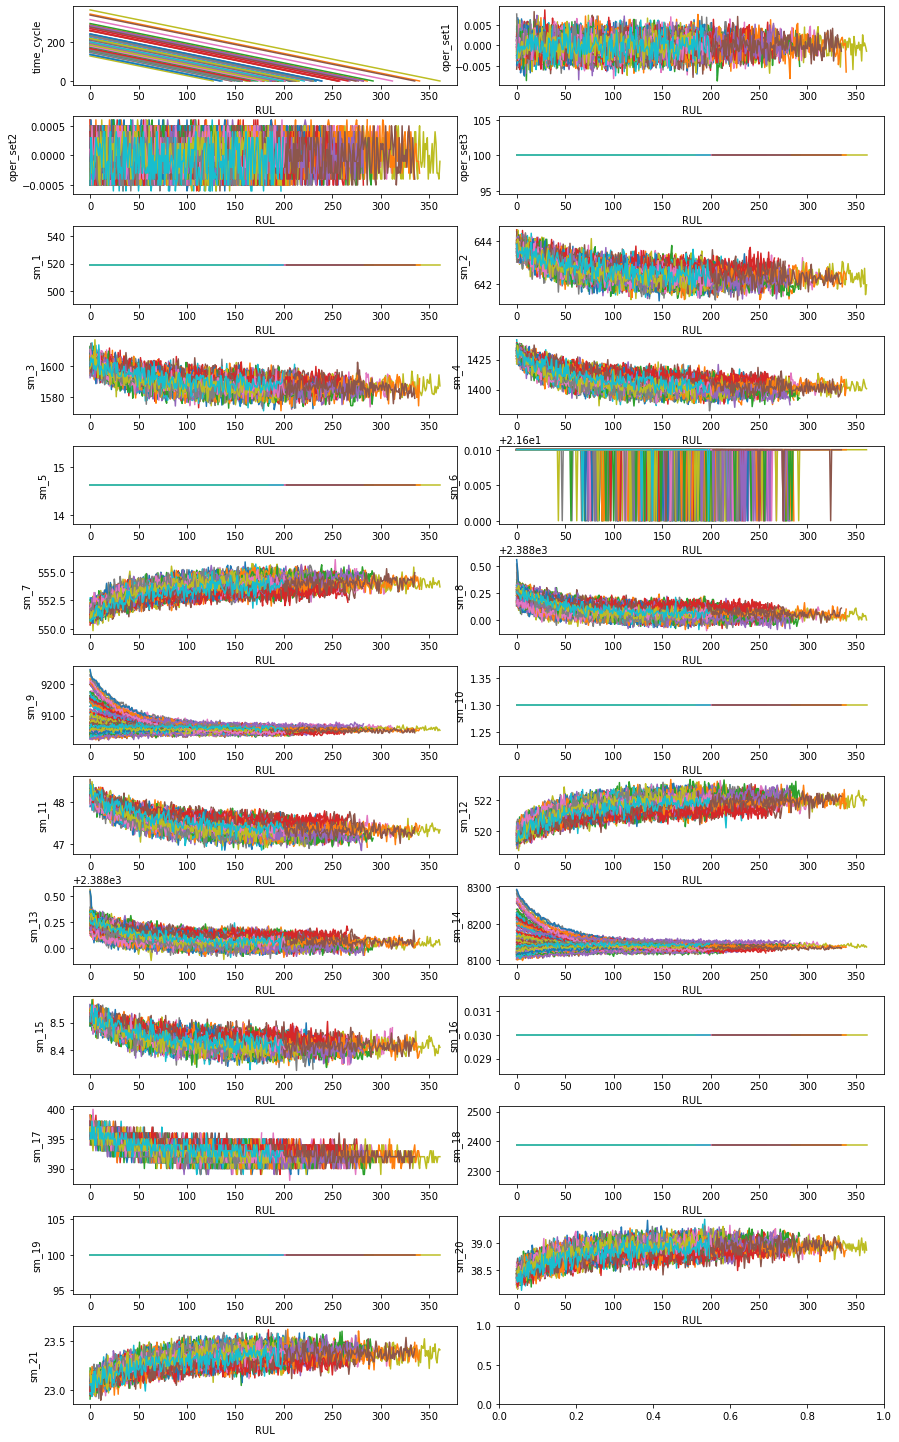

In [35]:
fig,ax=plt.subplots(13,2,figsize=(12,20))
fig.tight_layout()
r,c=0,0
for v_idx,v in enumerate(all_col[1:]):
    for i in train_df['unit_id'].unique():
        ax[r][c].plot('RUL',v,data=train_df[train_df['unit_id']==i])
            
    ax[r][c].set_xlabel('RUL')
    ax[r][c].set_ylabel(v) 
    if c<1:
        c+=1
    elif c==1:
         r+=1
         c-=1

In [36]:
cols_drop=['oper_set3','sm_1','sm_5','sm_6','sm_10','sm_14','sm_16','sm_18','sm_19']
train_df = train_df.drop(cols_drop, axis = 1)
test_df = test_df.drop(cols_drop, axis = 1)

In [37]:
train_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [38]:
train_df.corr()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
unit_id,1.000000,0.078753,-0.017895,-0.006197,0.014133,0.012621,0.026116,-0.032073,0.039929,-0.052053,0.024707,-0.031882,0.044230,0.022486,0.013513,-0.020589,-0.016465,0.078753
time_cycle,0.078753,1.000000,-0.004527,0.016132,0.549898,0.543947,0.624577,-0.595914,0.475977,0.443999,0.634385,-0.611354,0.477523,0.588676,0.566995,-0.583597,-0.585923,-0.736241
oper_set1,-0.017895,-0.004527,1.000000,0.011660,0.009030,-0.005651,0.009544,-0.009437,-0.000427,-0.004279,0.011658,-0.001491,0.002318,0.007652,0.002599,-0.005713,-0.014559,-0.003198
oper_set2,-0.006197,0.016132,0.011660,1.000000,0.007266,0.009068,0.014673,-0.016678,0.013285,-0.005425,0.011690,-0.010923,0.018156,0.014156,0.012280,-0.010554,-0.007846,-0.001948
sm_2,0.014133,0.549898,0.009030,0.007266,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.675975,0.629886,-0.661841,-0.668050,-0.606484
sm_3,0.012621,0.543947,-0.005651,0.009068,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.639921,0.600017,-0.625941,-0.633901,-0.584520
sm_4,0.026116,0.624577,0.009544,0.014673,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.758459,0.703499,-0.748067,-0.745193,-0.678948
sm_7,-0.032073,-0.595914,-0.009437,-0.016678,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.747051,-0.692893,0.736163,0.737447,0.657223
sm_8,0.039929,0.475977,-0.000427,0.013285,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,0.700949,0.627785,-0.687030,-0.688840,-0.563968
sm_9,-0.052053,0.443999,-0.004279,-0.005425,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.293753,0.337110,-0.285280,-0.292795,-0.390102


## 4. Data Preprocessing

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
features=list(train_df.columns[1:-1])

In [41]:
features

['time_cycle',
 'oper_set1',
 'oper_set2',
 'sm_2',
 'sm_3',
 'sm_4',
 'sm_7',
 'sm_8',
 'sm_9',
 'sm_11',
 'sm_12',
 'sm_13',
 'sm_15',
 'sm_17',
 'sm_20',
 'sm_21']

In [42]:
min_max_scaler = MinMaxScaler(feature_range=(-1,1))

train_df[features] = min_max_scaler.fit_transform(train_df[features])
test_df[features] = min_max_scaler.fit_transform(test_df[features])

In [43]:
test_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,-1.000000,0.3125,0.384615,0.192429,-0.156063,-0.435573,0.217742,-0.268293,-0.607050,-0.452055,0.068493,-0.348837,-0.305849,-0.25,0.000000,0.240198,0
1,1,-0.993377,-0.3125,-0.538462,-0.634069,0.008050,-0.549520,0.600806,-0.414634,-0.541916,-0.041096,0.269406,-0.209302,-0.544583,0.00,0.290909,0.291437,0
2,1,-0.986755,0.0625,0.076923,-0.160883,-0.070371,-0.307739,0.302419,-0.219512,-0.502989,-0.041096,0.182648,-0.348837,0.067114,0.00,0.400000,0.362208,0
3,1,-0.980132,0.5500,-0.076923,-0.173502,-0.216827,-0.100265,0.286290,-0.317073,-0.681839,-0.342466,-0.086758,-0.255814,-0.435283,-0.50,0.254545,0.240764,0
4,1,-0.973510,0.2000,-0.076923,-0.129338,-0.057388,-0.284051,0.322581,-0.414634,-0.693180,-0.301370,0.264840,-0.348837,-0.325983,-0.75,0.236364,0.352017,0


In [44]:
test_df.describe()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.0
mean,51.543907,-0.497771,0.023603,-0.070403,-0.151364,-0.010169,-0.169068,0.160291,-0.117247,-0.480807,-0.155885,0.081152,-0.158024,-0.107920,-0.107094,0.059094,0.133313,0.0
std,28.289423,0.351376,0.275336,0.452355,0.252933,0.259843,0.273159,0.274712,0.280204,0.175268,0.268380,0.255537,0.264811,0.278134,0.308394,0.257601,0.238132,0.0
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0
25%,28.000000,-0.788079,-0.162500,-0.384615,-0.326498,-0.191898,-0.364509,-0.020161,-0.317073,-0.594023,-0.356164,-0.086758,-0.348837,-0.302013,-0.250000,-0.109091,-0.019958,0.0
50%,52.000000,-0.549669,0.025000,-0.076923,-0.160883,-0.015840,-0.181131,0.177419,-0.121951,-0.497471,-0.164384,0.095890,-0.162791,-0.116970,0.000000,0.072727,0.143100,0.0
75%,76.000000,-0.258278,0.212500,0.384615,0.015773,0.159309,0.007147,0.354839,0.073171,-0.393410,0.013699,0.264840,0.023256,0.069032,0.000000,0.236364,0.297098,0.0
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [45]:
y_true

,RUL,number_unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [46]:
test_df = test_df.merge(y_true, on=['number_unit'], how='left')
test_df.head()

KeyError: 'number_unit'

In [47]:
train_df=train_df.groupby('number_unit')
test_df=test_df.groupby('number_unit')

KeyError: 'number_unit'

In [48]:
X_train = train_df.drop(['RUL'],axis=1).values
y_train = train_df['RUL'].values
X_test = test_df.drop(['RUL'],axis=1).values
y_test = test_df['RUL'].values

In [49]:
train_df.head()

,unit_id,time_cycle,oper_set1,oper_set2,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_15,sm_17,sm_20,sm_21,RUL
0,1,-1.000000,-0.080460,-0.666667,-0.632530,-0.186396,-0.380486,0.452496,-0.515152,-0.780490,-0.261905,0.266525,-0.588235,-0.272028,-0.333333,0.426357,0.449323,191
1,1,-0.994460,0.218391,-0.500000,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.799515,-0.238095,0.530917,-0.441176,-0.177376,-0.333333,0.333333,0.462027,190
2,1,-0.988920,-0.494253,0.500000,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.719914,-0.500000,0.590618,-0.558824,-0.285110,-0.666667,0.255814,0.242751,189
3,1,-0.983380,0.080460,0.000000,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.750965,-0.666667,0.778252,-0.411765,-0.666795,-0.333333,0.147287,0.324772,188
4,1,-0.977839,-0.218391,-0.333333,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.700081,-0.488095,0.492537,-0.529412,-0.195845,-0.166667,0.178295,0.409003,187


## 5. Gradient Boosting

In [50]:
len(X_train[0])

17

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [52]:
train_df.groupby('number_unit').head()

KeyError: 'number_unit'

In [53]:
reg = GradientBoostingRegressor(max_features='sqrt',n_estimators=1000,random_state=42)
reg.fit(X_train, y_train)

# predict and evaluate
y_hat_train = reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_hat_train)))

y_hat_test = reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_hat_test)))

15.263375618532807
109.97708473315768


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_hat_train))

y_hat_test = lm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_hat_test))

SyntaxError: invalid syntax (<ipython-input-55-8330b60c49a2>, line 8)

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
m = RandomForestRegressor(max_features='sqrt',n_estimators=1000,random_state=42)
m.fit(X_train, y_train)

y_hat_train = m.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_hat_train)))

y_hat_test = m.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_hat_test)))

10.45433806357838
112.43433114412424
